In [14]:
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina") # retina 설정

plt.style.use("seaborn-whitegrid") # 스타일 지정

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
raw = pd.read_csv('/content/drive/MyDrive/하영/캐글데이터로데이터분석하기/kaggle_survey_2020_responses.csv')
question = raw.iloc[0]
answer = raw.drop([0]) # 0번째를 제외하고 나머지

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Q3 In which country do you currently reside?

In [17]:
answer.head() # Q1 ~ Q6까지는 하나의 문항만 선택, Q7부터는 여러 문항 선택

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# 반복되는 코드를 함수화 하기
def show_countplot_by_qno(qno, fsize=(10,6), order=None):
  if not order:
    order = answer[qno].value_counts().index

  plt.figure(figsize=fsize)
  sns.countplot(data=answer, y=qno, palette="Blues_r", order=order)

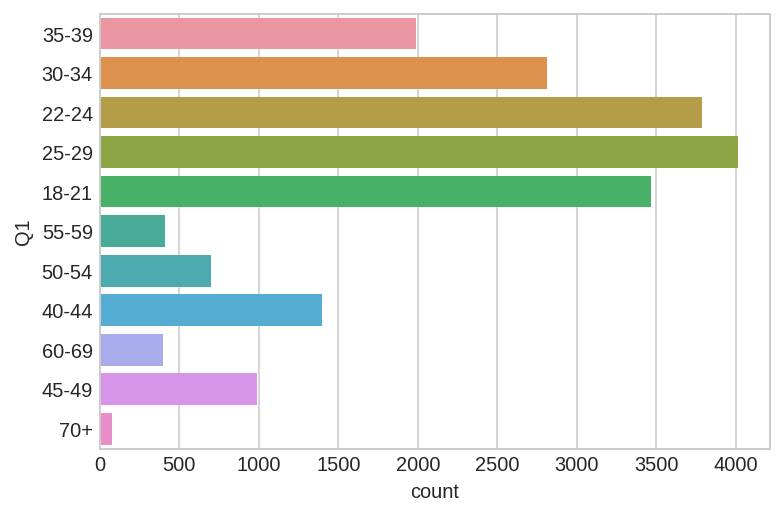

In [19]:
def show_countplot_by_qno(qno):
  sns.countplot(data=answer, y=qno)

show_countplot_by_qno("Q1")

In [20]:
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

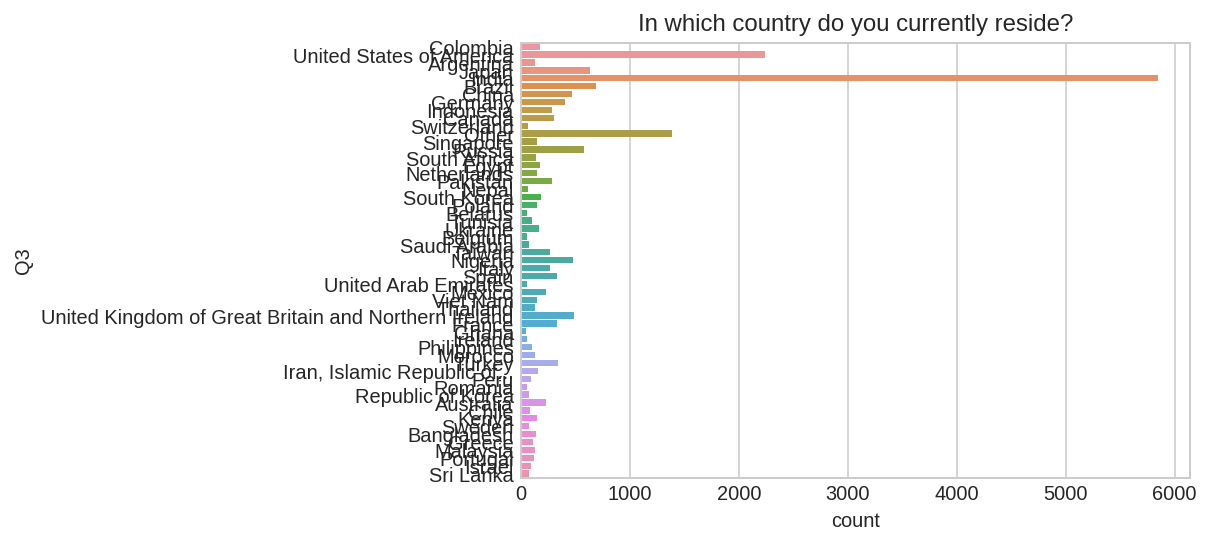

In [21]:
def show_countplot_by_qno(qno):
  sns.countplot(data=answer, y=qno).set_title(question[qno])

# show_countplot_by_qno("Q1")
# show_countplot_by_qno("Q2")
show_countplot_by_qno("Q3") # 그래프 사이즈 지정이 필요하겠다

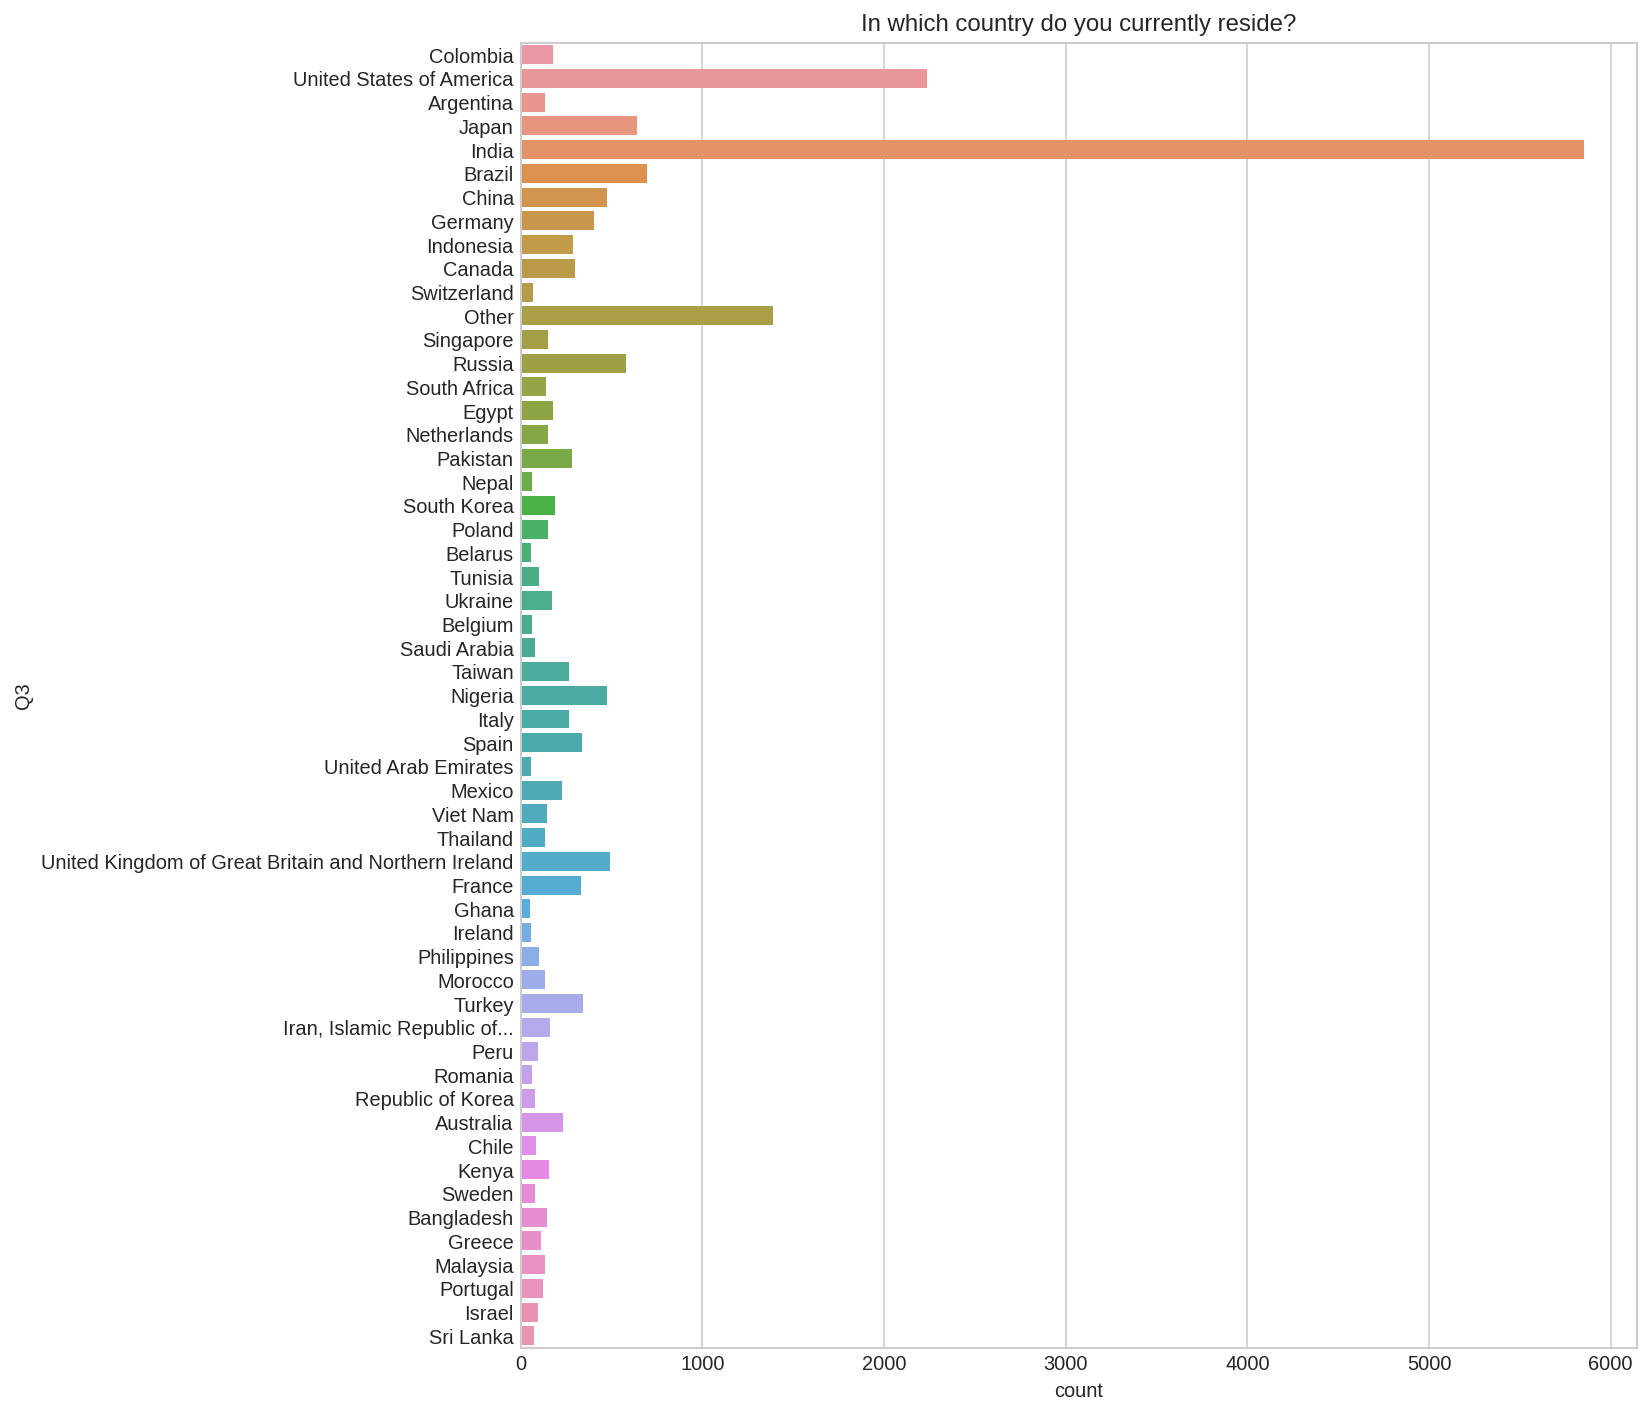

In [22]:
def show_countplot_by_qno(qno):
  plt.figure(figsize=(10,12))
  sns.countplot(data=answer, y=qno).set_title(question[qno])

show_countplot_by_qno("Q3") # 근데 모든 그래프를 이렇게 크게 만들면 안좋음.

In [33]:
def show_countplot_by_qno(qno, fsize=(10,6)): # 기본값은 (10,6) 으로 지정
  plt.figure(figsize=(10,12))
  sns.countplot(data=answer, y=qno).set_title(question[qno])

In [34]:
# show_countplot_by_qno("Q3", fsize=(10,12))
# show_countplot_by_qno("Q4")
# show_countplot_by_qno("Q5")
# show_countplot_by_qno("Q6")
show_countplot_by_qno("Q7") # Q7은 기본 형식으로 그릴 수 없음.

ValueError: ignored

<Figure size 720x864 with 0 Axes>

In [35]:
answer["Q1"].value_counts().index # 빈도수 많은 순서대로 index값을 뽑아옴

Index(['25-29', '22-24', '18-21', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-69', '70+'],
      dtype='object')

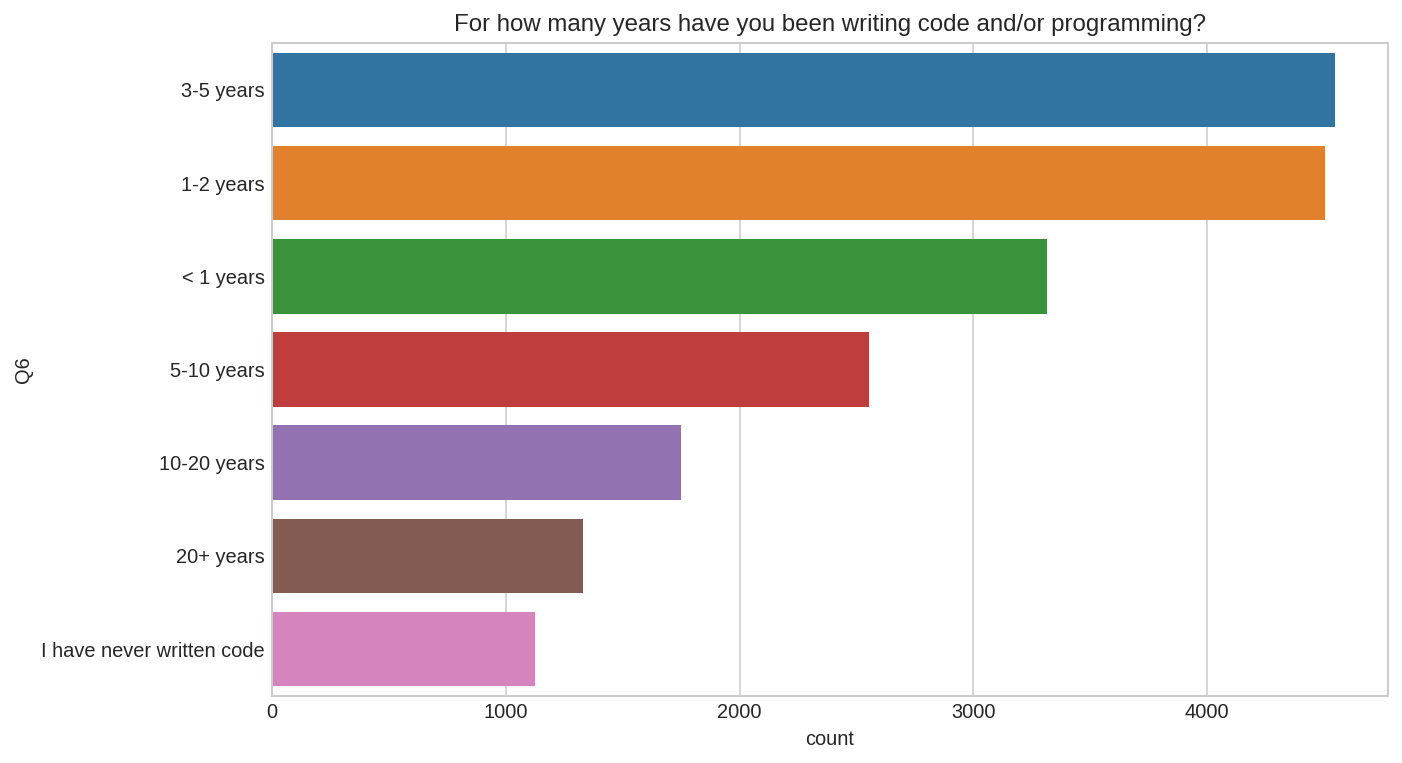

In [36]:
# 값이 많은 순으로 정렬하게 하려면
def show_countplot_by_qno(qno, fsize=(10,6)):
  order = answer[qno].value_counts().index
  plt.figure(figsize=fsize)
  sns.countplot(data=answer, y=qno, 
                order=order
                ).set_title(question[qno])

show_countplot_by_qno("Q6")

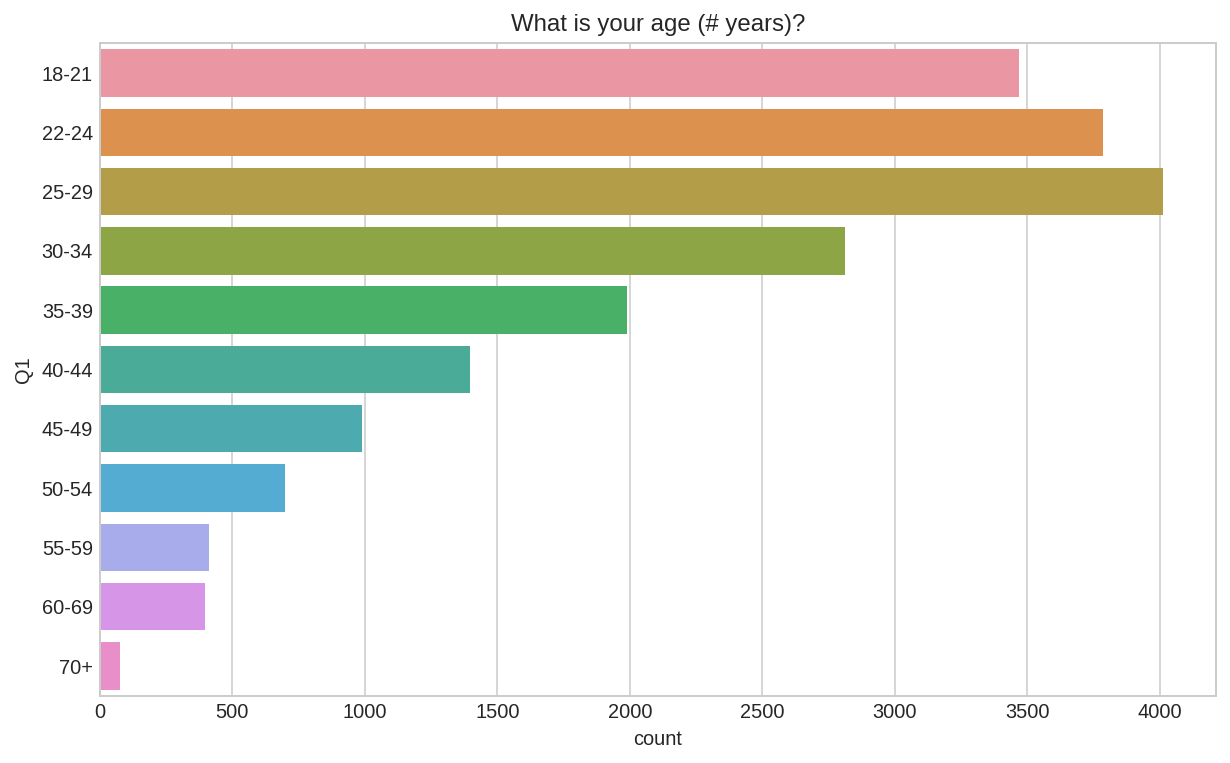

In [37]:
# order을 따로 정하고 싶을 때를 위해 파라미터로 빼기
def show_countplot_by_qno(qno, fsize=(10,6), order=None):
  if not order:
    order = answer[qno].value_counts().index
  plt.figure(figsize=fsize)
  sns.countplot(data=answer, y=qno, 
                order=order
                ).set_title(question[qno])

q1_cols = answer["Q1"].value_counts().sort_index().index.tolist()
show_countplot_by_qno("Q1", order=q1_cols)

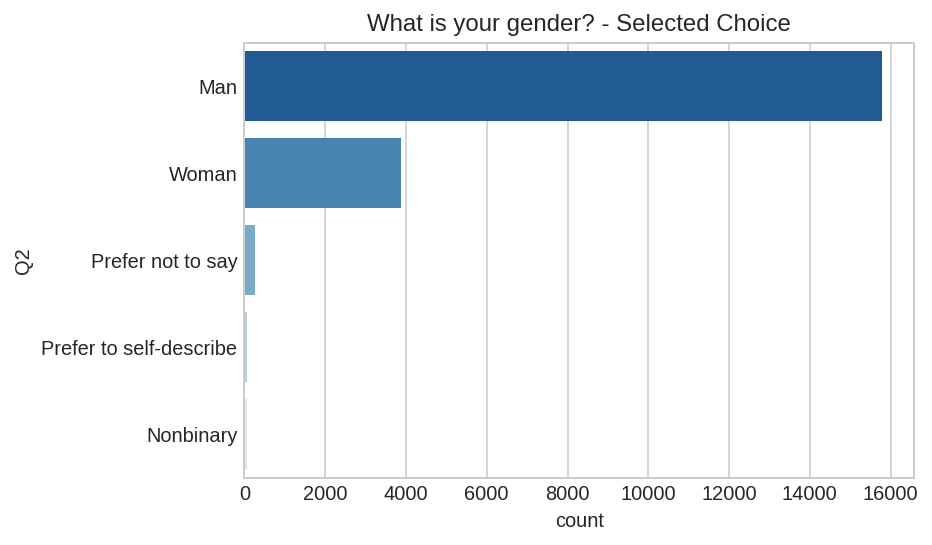

In [38]:
# 팔레트 지정
def show_countplot_by_qno(qno, fsize=(10,6), order=None):
  if not order:
    order = answer[qno].value_counts().index
  plt.figure(figsize=fsize)
  sns.countplot(data=answer, y=qno, 
                order=order, palette="Blues_r"
                ).set_title(question[qno])

show_countplot_by_qno("Q2", fsize=(6,4))

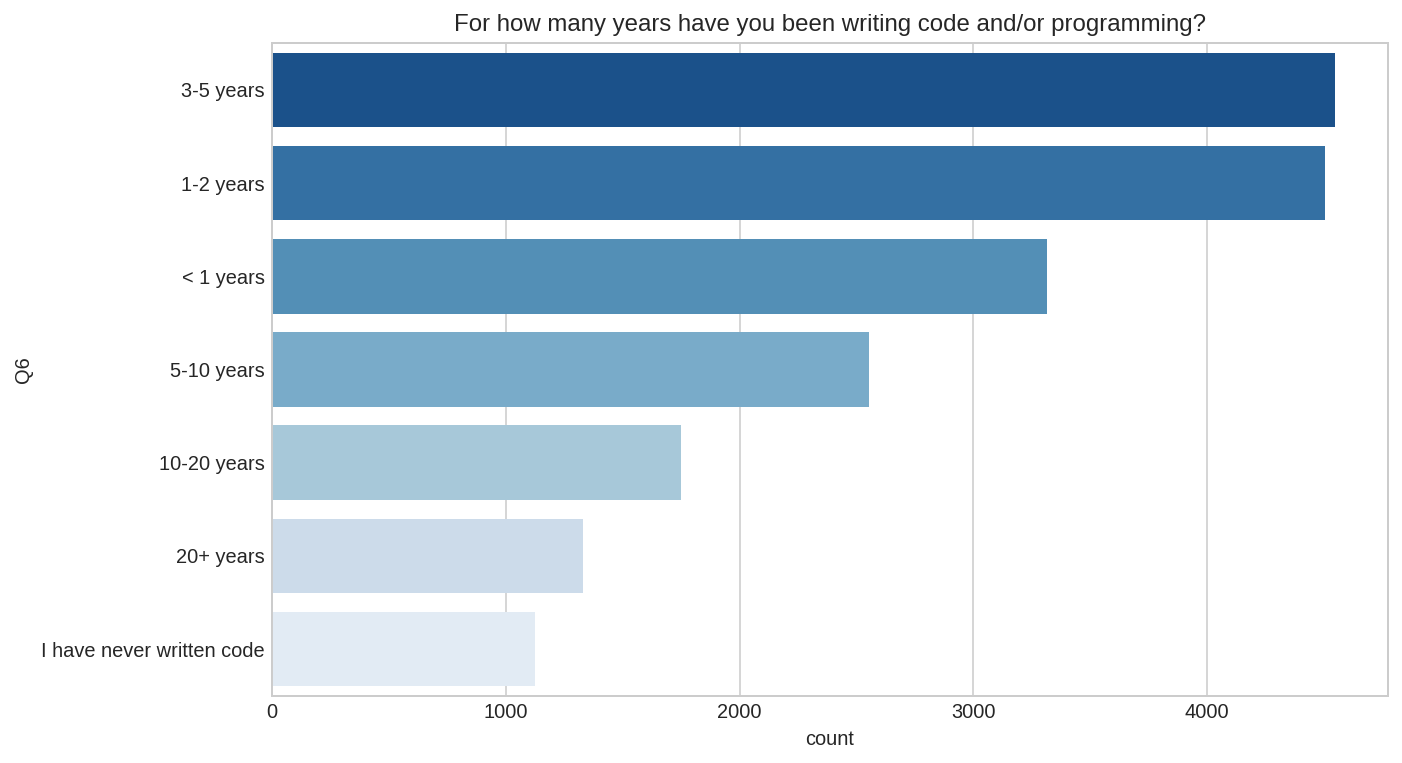

In [39]:
# show_countplot_by_qno("Q4") # 학력
# show_countplot_by_qno("Q5") # 직업군 분포
show_countplot_by_qno("Q6") # 경력

In [40]:
# Q7부터는 함수를 사용하지 못함.
show_countplot_by_qno("Q7")

KeyError: ignored

In [41]:
# show_countplot_by_qno? # 도움말
# show_countplot_by_qno?? # 소스코드

# Q4 What is the highest level of formal education that you have attained or plan to attain within the next 2 years

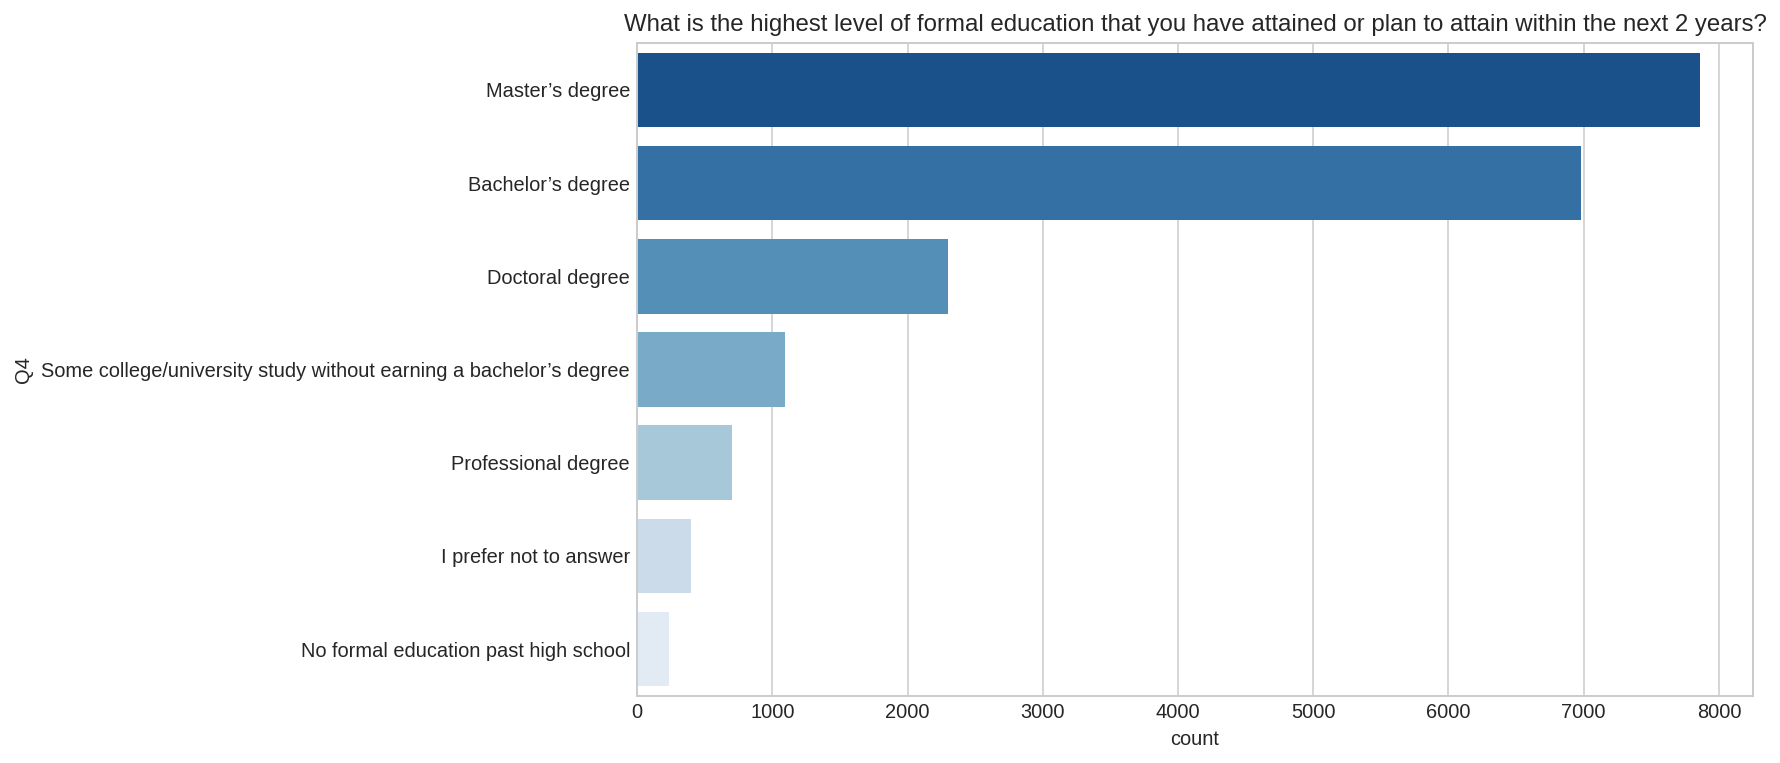

In [42]:
show_countplot_by_qno("Q4")

# 05 Select the title most similar to your current role (or most recent title if retired): - Selected Choice

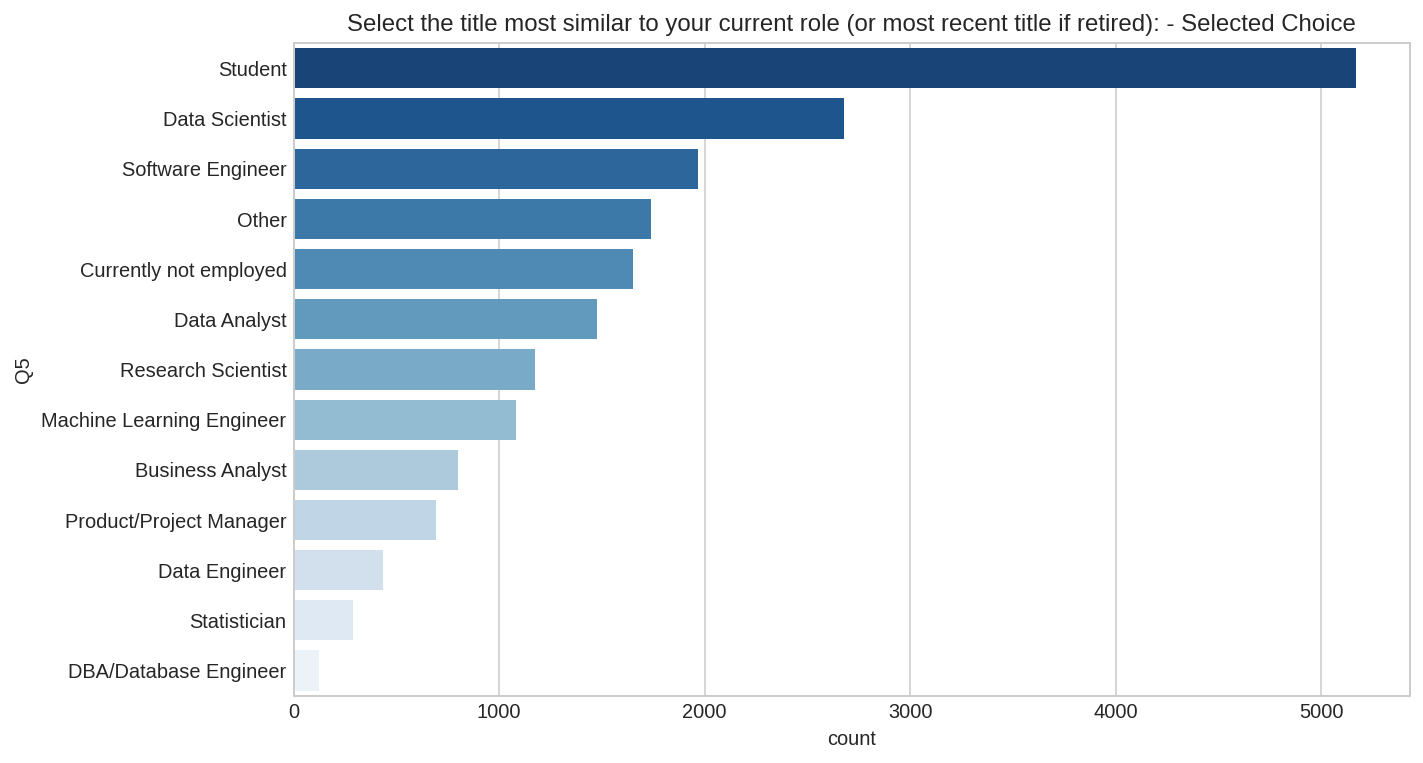

In [43]:
show_countplot_by_qno("Q5")

# 06 For how many years have you been writing code and/or programming?

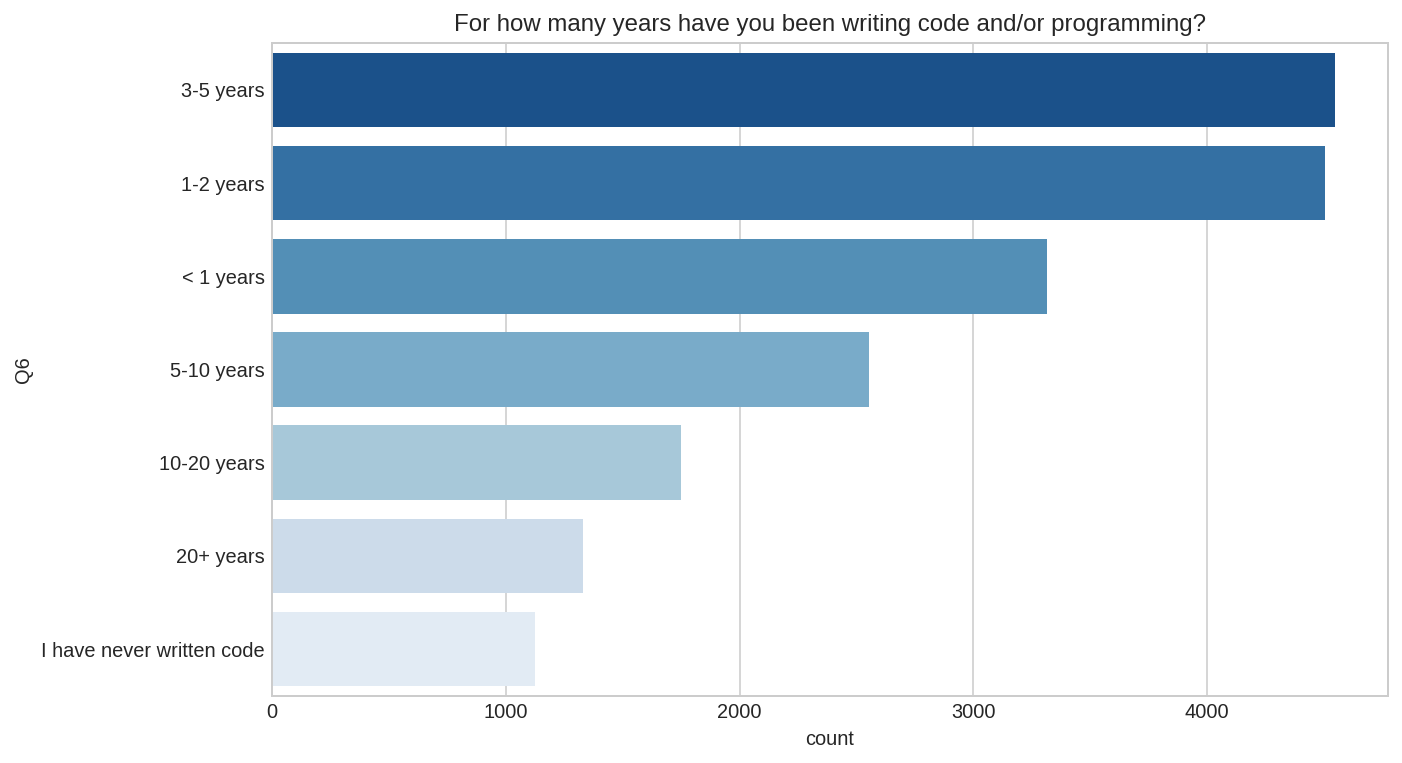

In [30]:
show_countplot_by_qno("Q6")